In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_columns',200)

In [9]:
# Loaded the dataset with parse dates option of read_csv
df = pd.read_csv('../input/QueryResults.csv',parse_dates=['creationdate'])
df.head(5)

,id,posttypeid,creationdate,score,viewcount,tags,answercount,favoritecount
0,65678,1,2020-01-01 01:07:22,0,60,<machine-learning><deep-learning><data-mining><statistics><logistic-regression>,0,NaN
1,65680,1,2020-01-01 07:53:47,1,43,<python><k-means><image-segmentation>,1,NaN
2,65684,1,2020-01-01 11:27:44,3,296,<r><random-forest><bigdata>,2,1.0
3,65686,1,2020-01-01 13:56:11,1,117,<computer-vision><image-recognition><vae>,0,1.0
4,65688,1,2020-01-01 16:17:40,2,79,<machine-learning><neural-network><deep-learning><keras><nlp>,1,NaN


In [10]:
# Dropping the below column as all posts are of same type: questions
df.drop(columns='posttypeid',inplace=True)

In [11]:
print('Shape of the dataset: ' + str(df.shape) )

Shape of the dataset: (7503, 7)


In [12]:
# id, posttypeid are just unique identifiers
# Because of null values in favoritecount column, datatype is float
# It can be casted to int after filling in the null values 
# Other datatypes seem to be appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7503 non-null   int64         
 1   creationdate   7503 non-null   datetime64[ns]
 2   score          7503 non-null   int64         
 3   viewcount      7503 non-null   int64         
 4   tags           7503 non-null   object        
 5   answercount    7503 non-null   int64         
 6   favoritecount  883 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 410.4+ KB


In [13]:
# Except for the favoritecount column, there are no null values in other columns
df.isnull().sum()

id                  0
creationdate        0
score               0
viewcount           0
tags                0
answercount         0
favoritecount    6620
dtype: int64

In [14]:
# There are 6620 null values in favoritecount column. 
# It is safe to replace the null values with 0
df.favoritecount.value_counts(dropna=False)

NaN     6620
1.0      657
0.0       95
2.0       92
3.0       20
6.0        7
4.0        6
5.0        3
10.0       2
7.0        1
Name: favoritecount, dtype: int64

In [15]:
# Filling the null values with 0
df = df.fillna(value=0)
df['favoritecount'] = df['favoritecount'].astype(int)
df.isnull().sum()

id               0
creationdate     0
score            0
viewcount        0
tags             0
answercount      0
favoritecount    0
dtype: int64

In [16]:
# Changed the datatype of favoritecount to int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7503 non-null   int64         
 1   creationdate   7503 non-null   datetime64[ns]
 2   score          7503 non-null   int64         
 3   viewcount      7503 non-null   int64         
 4   tags           7503 non-null   object        
 5   answercount    7503 non-null   int64         
 6   favoritecount  7503 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 410.4+ KB


In [17]:
# In tags column, there are multiple tags separated by <> 
# To do analysis, it would be better if tags are converted to a list 

def clean_tags(value):
    value = value.replace(r'>',',')
    value = value.replace(r'<', '')
    value = value.split(',')
    value.remove('')
    return value


In [18]:
x= clean_tags('<machine-learning><deep-learning><data-mining><statistics><logistic-regression>')

In [19]:
df['tags'] = df['tags'].apply(lambda v: clean_tags(str(v)))

In [20]:
df['tags'].sample(10,random_state=8)

3606                                 [decision-trees, cart]
1671        [machine-learning, python, logistic-regression]
4526                             [python, confusion-matrix]
428                         [neural-network, deep-learning]
5620                                     [machine-learning]
564     [python, scikit-learn, feature-selection, training]
6175                                            [gpu, cuda]
868                                    [deep-learning, gan]
148                                          [jupyter, pip]
5360                         [nlp, clustering, text-mining]
Name: tags, dtype: object

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

Count how many times each tag was used.  
Count how many times each tag was viewed.  
Create visualizations for the top tags of each of the above results.  

In [21]:
# Get the list of all unique tags

unique_tags = []
for tags in df['tags']:
    for tag in tags:
        unique_tags.append(tag)

unique_tags = set(unique_tags)
unique_tags = list(unique_tags)
unique_tags.sort()
        

In [22]:
print('Total number of unique tags: ' + str(len(unique_tags)))

Total number of unique tags: 592


In [23]:
from collections import defaultdict

In [24]:
# Now that we have the list of unique tags, lets get the 
# frequency of each tag from the questions dataset df 

tag_freq = defaultdict(int)

for index, item in df['tags'].iteritems():
    #print(index, item)
    for tag in item:
        tag_freq[tag] +=1
    

In [25]:
keys_sorted= sorted(tag_freq.items(),key= lambda kv: kv[1],reverse=True)
keys_sorted[:10]

[('machine-learning', 2169),
 ('python', 1418),
 ('deep-learning', 1060),
 ('neural-network', 867),
 ('keras', 686),
 ('classification', 634),
 ('tensorflow', 584),
 ('nlp', 504),
 ('scikit-learn', 494),
 ('time-series', 394)]

In [26]:
tagfreq_df = pd.DataFrame(keys_sorted,columns=['tag','count'])
tagfreq_df.head(15)

,tag,count
0,machine-learning,2169
1,python,1418
2,deep-learning,1060
3,neural-network,867
4,keras,686
5,classification,634
6,tensorflow,584
7,nlp,504
8,scikit-learn,494
9,time-series,394


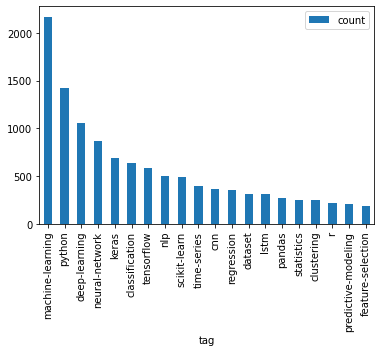

In [27]:
tagfreq_df.head(20).plot(kind='bar',x='tag',y='count')
plt.show()

In [28]:
view_freq = defaultdict(int)

for index,row in df.iterrows():
    for tag in row['tags']:
        view_freq[tag] += row['viewcount']
        

In [29]:
view_freq
keys_sorted= (sorted(view_freq.items(),key= lambda kv: kv[1],reverse=True))
keys_sorted[:10]

[('machine-learning', 225765),
 ('python', 217005),
 ('keras', 126425),
 ('deep-learning', 97367),
 ('tensorflow', 88465),
 ('pandas', 81311),
 ('neural-network', 76851),
 ('scikit-learn', 75113),
 ('nlp', 58276),
 ('classification', 55619)]

In [30]:
viewfreq_df = pd.DataFrame(keys_sorted,columns=['tag','count'])
viewfreq_df.head(15)

,tag,count
0,machine-learning,225765
1,python,217005
2,keras,126425
3,deep-learning,97367
4,tensorflow,88465
5,pandas,81311
6,neural-network,76851
7,scikit-learn,75113
8,nlp,58276
9,classification,55619


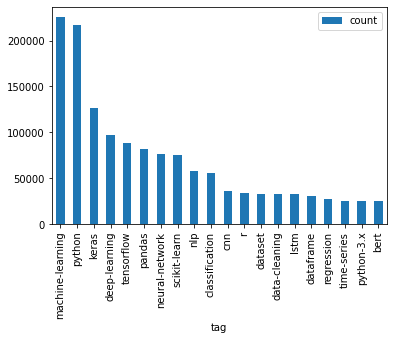

In [31]:
viewfreq_df.head(20).plot(kind='bar',x='tag',y='count')
plt.show()

In [32]:
merged_df = pd.merge(tagfreq_df.head(20),viewfreq_df.head(20),how='left',on = 'tag')
merged_df.head(20)

,tag,count_x,count_y
0,machine-learning,2169,225765.0
1,python,1418,217005.0
2,deep-learning,1060,97367.0
3,neural-network,867,76851.0
4,keras,686,126425.0
5,classification,634,55619.0
6,tensorflow,584,88465.0
7,nlp,504,58276.0
8,scikit-learn,494,75113.0
9,time-series,394,25526.0


In [33]:
merged_df.loc[merged_df['count_y'].isnull()==True,'tag'].tolist()

['statistics', 'clustering', 'predictive-modeling', 'feature-selection']

In [34]:
merged_df2 = pd.merge(tagfreq_df.head(20),viewfreq_df.head(20),how='right',on = 'tag')
merged_df2.head(20)

,tag,count_x,count_y
0,machine-learning,2169.0,225765
1,python,1418.0,217005
2,keras,686.0,126425
3,deep-learning,1060.0,97367
4,tensorflow,584.0,88465
5,pandas,274.0,81311
6,neural-network,867.0,76851
7,scikit-learn,494.0,75113
8,nlp,504.0,58276
9,classification,634.0,55619


In [35]:
merged_df2.loc[merged_df2['count_x'].isnull()==True,'tag'].tolist()

['data-cleaning', 'dataframe', 'python-3.x', 'bert']